<h1 style="margin-bottom: 0px; fontcolor:'red'"><center><strong>Universidade Federal do Rio de Janeiro</strong></center></h1>
<h3><center><strong>Programa de Pós-Graduação em Meteorologia</strong></center></h3>
<h4><center>Disciplina de Instrumentação Oceanográfica</center></h4>
<h4><center>Atividade II</center></h4>
<h4><center>Perfis de velocidade obtidos através de perfiladores acústicos de correntes</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pandasgui
%matplotlib inline


### Carregando os arquivos...

In [2]:
depth_file = "dataset/S2 - Depth.txt"
dir_file = "dataset/S2 - Dir.txt"
mag_file = "dataset/S2 - Mag.txt"
prh_file = "dataset/S2 - PRH.txt"

In [3]:
#Ens	YR	MO	DA	HH	MM	SS	HH		Dep
depth_cols = ["ens", "year", "month", "day", "hour", "minute", "second", "hh", "dummy","depth2"]
depth = pd.read_csv(depth_file,
                    header = None,
                    skiprows = 16,
                    names = depth_cols,
                    encoding = "ISO-8859-1",
                    delimiter = "\t",
                    index_col = False)

dir_df = pd.read_csv(dir_file,
                   # header = None,
                    skiprows = 12,
                   #  delim_whitespace = True,
                     skipinitialspace=True,
                   # names = depth_cols,
                    encoding = "ISO-8859-1",
                    delimiter = "\t",
                    index_col = False)

mag_df = pd.read_csv(mag_file,
                   # header = None,
                    skiprows = 12,
                   #  delim_whitespace = True,
                     skipinitialspace=True,
                   # names = depth_cols,
                    encoding = "ISO-8859-1",
                    delimiter = "\t",
                    index_col = False)


prh_df = pd.read_csv(prh_file,
                   # header = None,
                    skiprows = 12,
                    delim_whitespace = True,
                    skipinitialspace=True,
                    skip_blank_lines=True,
                   # names = depth_cols,
                    encoding = "ISO-8859-1",
                    #delimiter = "\t",
                    index_col = False)
                    

In [4]:
dir_df

,Ens,YR,MO,DA,HH,MM,SS,HH.1,Unnamed: 8,Dir,...,Dir.30,Dir.31,Dir.32,Dir.33,Dir.34,Dir.35,Dir.36,Dir.37,Dir.38,Dir.39
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deg,...,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,31,32,33,34,35,36,37,38,39,40
2,1.0,14.0,10.0,31.0,7.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,14.0,10.0,31.0,7.0,10.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,14.0,10.0,31.0,7.0,20.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1303.0,14.0,11.0,9.0,8.0,0.0,0.0,0.0,NaN,179.70,...,170.60,174.30,167.40,163.60,173.80,182.70,162.80,NaN,NaN,NaN
1305,1304.0,14.0,11.0,9.0,8.0,10.0,0.0,0.0,NaN,180.80,...,173.10,172.30,174.70,179.60,174.70,NaN,NaN,NaN,NaN,NaN
1306,1305.0,14.0,11.0,9.0,8.0,20.0,0.0,0.0,NaN,177.20,...,175.30,173.10,178.60,175.70,186.20,162.20,197.00,NaN,NaN,NaN
1307,1306.0,14.0,11.0,9.0,8.0,30.0,0.0,0.0,NaN,173.70,...,176.00,176.70,176.10,175.80,179.60,164.50,170.50,181.70,139.90,NaN


In [5]:
dir_df.drop(dir_df.index[0:2], axis=0, inplace=True)

In [6]:
dir_df.reset_index(inplace=True, drop=True)

In [7]:
dir_df.head(5)

,Ens,YR,MO,DA,HH,MM,SS,HH.1,Unnamed: 8,Dir,...,Dir.30,Dir.31,Dir.32,Dir.33,Dir.34,Dir.35,Dir.36,Dir.37,Dir.38,Dir.39
0,1.0,14.0,10.0,31.0,7.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,14.0,10.0,31.0,7.0,10.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,14.0,10.0,31.0,7.0,20.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,14.0,10.0,31.0,7.0,30.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,14.0,10.0,31.0,7.0,40.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mag_df.drop(mag_df.index[0:3], axis=0, inplace=True)

In [9]:
mag_df.reset_index(inplace = True, drop=True)

In [10]:
mag_df.head(6)

,Ens,YR,MO,DA,HH,MM,SS,HH.1,Unnamed: 8,Mag,...,Mag.30,Mag.31,Mag.32,Mag.33,Mag.34,Mag.35,Mag.36,Mag.37,Mag.38,Mag.39
0,1.0,14.0,10.0,31.0,7.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,14.0,10.0,31.0,7.0,10.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,14.0,10.0,31.0,7.0,20.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,14.0,10.0,31.0,7.0,30.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,14.0,10.0,31.0,7.0,40.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,14.0,10.0,31.0,7.0,50.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
prh_df.drop(prh_df.index[0], axis=0, inplace=True)
prh_df.reset_index(inplace=True, drop=True)

# adjust data type YR and MO
cols_to_int = ['YR', 'MO']

prh_df[cols_to_int] = prh_df[cols_to_int].astype(int) 


prh_df.head(5)


,Ens,YR,MO,DA,HH,MM,SS,HH.1,Pit,Rol,Hea
0,1,14,10,31.0,7.0,0.0,0.0,0.0,-23.99,-25.55,121.58
1,2,14,10,31.0,7.0,10.0,0.0,0.0,-23.99,-25.55,121.79
2,3,14,10,31.0,7.0,20.0,0.0,0.0,-23.99,-25.55,121.76
3,4,14,10,31.0,7.0,30.0,0.0,0.0,-23.99,-25.55,121.77
4,5,14,10,31.0,7.0,40.0,0.0,0.0,-23.99,-25.55,121.77


### Ajustando as datas

In [12]:
def create_date_time(df, rename=True):
    
    if rename == True:
        df.rename(columns={"YR":"year", "MO":"month", "DA":"day", "HH":"hour", "MM":"minute","SS":"second"}, inplace=True)
    
    df['year'].replace(14,2014, inplace=True)
    date_cols = ["year", "month", "day", "hour", "minute","second"]
    
    date_time_col = pd.to_datetime(df[date_cols], format="%Y-%m-%d %H:%M%:%S", errors='coerce') 
    
    df.insert(0, 'date_time', date_time_col)
    
    df.drop(date_cols, axis=1, inplace=True)
    
    return df

def remove_unamed(df):
    
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    return df

In [13]:
dir_df = create_date_time(dir_df)
dir_df = remove_unamed(dir_df)
dir_df

,date_time,Ens,HH.1,Dir,Dir.1,Dir.2,Dir.3,Dir.4,Dir.5,Dir.6,...,Dir.30,Dir.31,Dir.32,Dir.33,Dir.34,Dir.35,Dir.36,Dir.37,Dir.38,Dir.39
0,2014-10-31 07:00:00,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10-31 07:10:00,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-10-31 07:20:00,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-31 07:30:00,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-10-31 07:40:00,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,2014-11-09 08:00:00,1303.0,0.0,179.70,183.70,186.70,188.60,188.60,188.10,187.40,...,170.60,174.30,167.40,163.60,173.80,182.70,162.80,NaN,NaN,NaN
1303,2014-11-09 08:10:00,1304.0,0.0,180.80,182.10,181.50,182.70,183.50,184.00,184.40,...,173.10,172.30,174.70,179.60,174.70,NaN,NaN,NaN,NaN,NaN
1304,2014-11-09 08:20:00,1305.0,0.0,177.20,181.10,182.40,181.50,181.60,182.90,182.40,...,175.30,173.10,178.60,175.70,186.20,162.20,197.00,NaN,NaN,NaN
1305,2014-11-09 08:30:00,1306.0,0.0,173.70,176.80,178.40,180.00,181.80,181.40,181.30,...,176.00,176.70,176.10,175.80,179.60,164.50,170.50,181.70,139.90,NaN


In [67]:
mag_df = create_date_time(mag_df)
mag_df = remove_unamed(mag_df)
mag_df.head(7)

,date_time,Ens,HH.1,Mag,Mag.1,Mag.2,Mag.3,Mag.4,Mag.5,Mag.6,...,Mag.30,Mag.31,Mag.32,Mag.33,Mag.34,Mag.35,Mag.36,Mag.37,Mag.38,Mag.39
0,2014-10-31 07:00:00,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10-31 07:10:00,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-10-31 07:20:00,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-10-31 07:30:00,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-10-31 07:40:00,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-10-31 07:50:00,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-10-31 08:00:00,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
prh_df = create_date_time(prh_df)
prh_df = remove_unamed(prh_df)
prh_df.head(7)

,date_time,Ens,HH.1,Pit,Rol,Hea
0,2014-10-31 07:00:00,1,0.0,-23.99,-25.55,121.58
1,2014-10-31 07:10:00,2,0.0,-23.99,-25.55,121.79
2,2014-10-31 07:20:00,3,0.0,-23.99,-25.55,121.76
3,2014-10-31 07:30:00,4,0.0,-23.99,-25.55,121.77
4,2014-10-31 07:40:00,5,0.0,-23.99,-25.55,121.77
5,2014-10-31 07:50:00,6,0.0,-23.99,-25.55,121.78
6,2014-10-31 08:00:00,7,0.0,-23.99,-25.55,121.88


In [16]:
depth = create_date_time(depth, rename = False)

In [17]:
depth.drop(['ens','hh','dummy'],axis=1, inplace=True)

In [19]:
depth.rename(columns={'depth2':'depth'}, inplace=True)

In [ ]:
depth

### Selecionado profundidades para SUPERFÍCIE, MEIO E FUNDO.
Sendo 27 / 28 metros de profundidade, será considerado superfície 1m, meio 14m e fundo 27m

1. Removendo os dados com ADCP na superfície (dados espúrios)

In [61]:
valid_data = depth['depth'] > 25

0       False
1       False
2       False
3       False
4       False
        ...  
1302     True
1303     True
1304     True
1305     True
1306     True
Name: depth, Length: 1307, dtype: bool

In [68]:
valid_mag = mag_df[valid_data]
valid_dir = dir_df[valid_data]
valid_prh = prh_df[valid_data]

### Considerando a profundidade média de 27 metros. A primeira célula de profundidade é considerada como:
27 - 2.12 = 24.88 -> ~ 25m

Sendo assim, a profundidade do nível 1 está na profundidade real de 25 metros (aprox). Considerando o bin size de 1 metro, o nível 2 está na profundidade de 24 e assim por diante.

Desta forma, até a superfície terá 25 níveis válidos de mensuração (nível 25 = prof 0m). Sendo assim, a profundidade profunda será para o nível = 1, a de meia água nível = 12 e a de superfície nível = 24 (para evitar a interface ar-água)

### Visualizando

In [78]:
# Configurando alguns padroes para as figuras
figsize_plots = (30,6)
fontsize_legend = 14
fontsize_title = 16
fontsize_ticks = 14
fontsize_label = 14

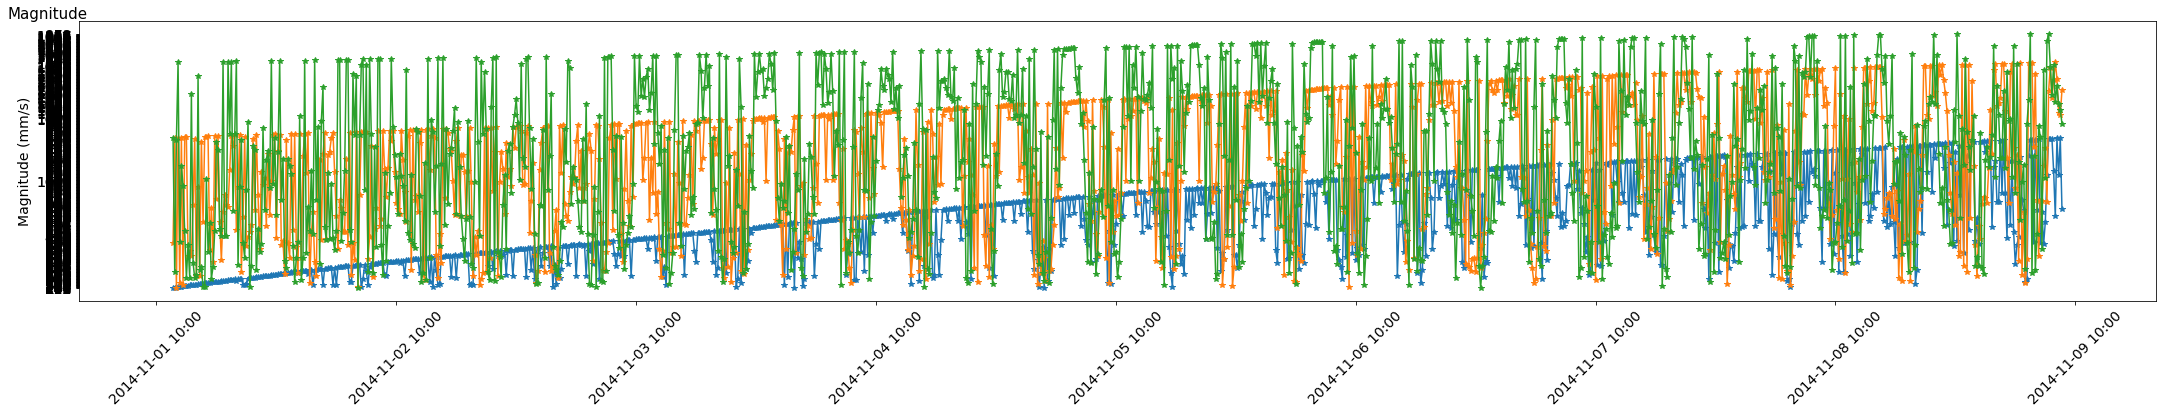

In [81]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Magnitude", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
hora = mdates.HourLocator(interval = 24)


ax.plot(valid_mag['date_time'], valid_mag['Mag'], marker="*", label = "1m")
ax.plot(valid_mag['date_time'], valid_mag['Mag.11'], marker="*", label = "12m")
ax.plot(valid_mag['date_time'], valid_mag['Mag.23'], marker="*", label = "25m")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
ax.xaxis.set_major_locator(hora)
#ax.set_title('04/11/2018')
ax.tick_params(labelsize=fontsize_ticks)
#ax.grid()
    
fig.tight_layout()
#plt.savefig('manual_dia_1_raw.png', dpi = 300)

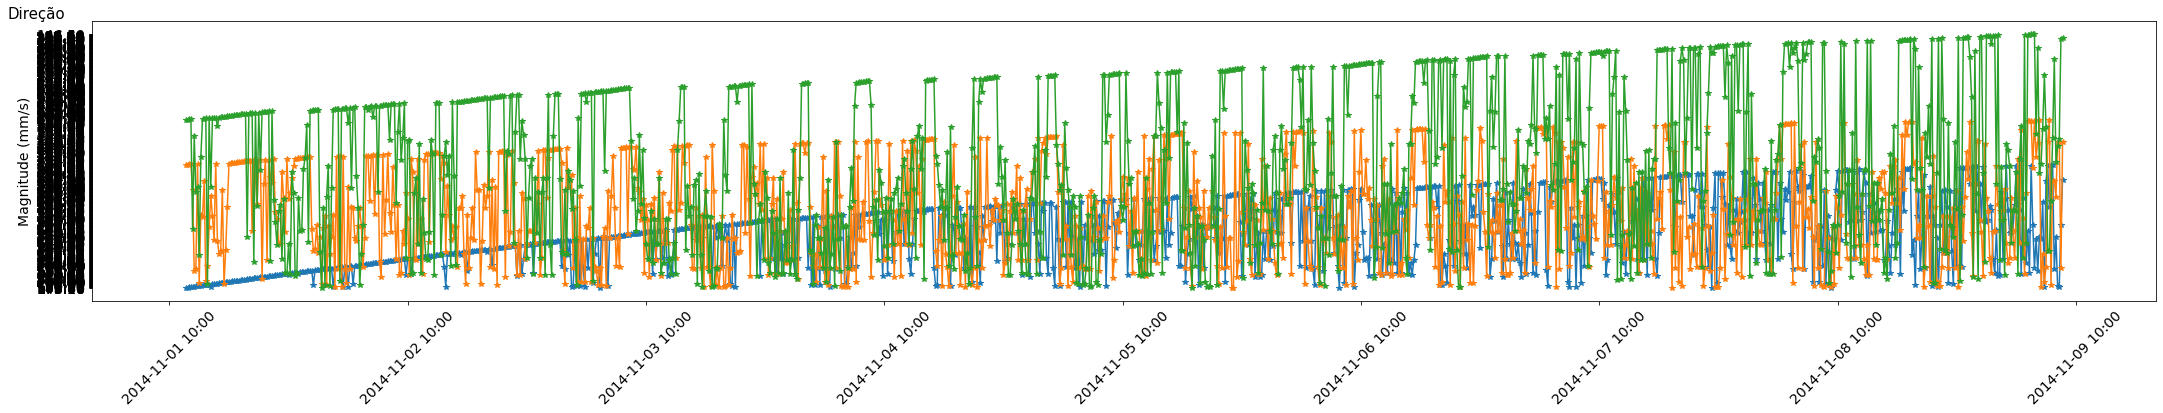

In [82]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Direção", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#min30 = mdates.MinuteLocator(interval = 300)
hora = mdates.HourLocator(interval = 24)


ax.plot(valid_dir['date_time'], valid_dir['Dir'], marker="*", label = "1m")
ax.plot(valid_dir['date_time'], valid_dir['Dir.11'], marker="*", label = "12m")
ax.plot(valid_dir['date_time'], valid_dir['Dir.23'], marker="*", label = "25m")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Magnitude (mm/s)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
#ax.xaxis.set_minor_locator(min30)
ax.xaxis.set_major_locator(hora)
#ax.set_title('04/11/2018')
ax.tick_params(labelsize=fontsize_ticks)
#ax.grid()
    
fig.tight_layout()
#plt.savefig('manual_dia_1_raw.png', dpi = 300)

In [ ]:
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Observação Manual - Dia 1", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_1['datetime'], tide_1_dia_1['water_level'], marker=".")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min30)
ax.xaxis.set_major_locator(hora)
ax.set_title('04/11/2018')
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
    
fig.tight_layout()
plt.savefig('manual_dia_1_raw.png', dpi = 300)